# HW4

---

#### Name: 吳原博
#### Student ID: 0816004

---

In [408]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

%matplotlib inline

# Linear Regression

### Data Generation & Processing
我先使用 random 模組生隨機資料，然後再以 sklearn 的 PolynomialFeatures 做 data processing

In [304]:
rand_x = np.random.uniform(-1.5,1,1000)
rand_nrm = np.random.normal(0,0.5,1000)
rand_y = [0 for i in range(1000)]
for idx,i in enumerate(zip(rand_x,rand_nrm)):
    rand_y[idx] = pow(i[0],3) * 3 + pow(i[0],2) * 2 - i[0] * 3 + 1 + i[1]
poly_x = []
for i in range(4):
    poly = PolynomialFeatures(i+1)
    poly_x.append(poly.fit_transform(rand_x.reshape(-1,1)))

### Model Construction
在這裡我使用 sklearn 的 linear regression 模組，並且將結果和係數整理好，再順便把係數做四捨五入

In [305]:
result = []
coef = []
for i in range(4):
    reg = LinearRegression().fit(poly_x[i], rand_y)
    result.append(reg.predict(poly_x[i]))
    coef.append([round(i,2) for i in reg.coef_])
    coef[i][0] = round(reg.intercept_,2)
#for i in range(4):
#    print(coef[i])

### Result & Bonus
從結果看來，當 PolynomialFeatures 的 degree 大於等於三時，預測出的函數會更符合資料分布  
前面的一段 if else 是為了處理 Latex 的語法  
另外，在結果的圖裡，紅色(四維)和綠色(三維)的線幾乎都重疊在一起，所以可能分不太出來

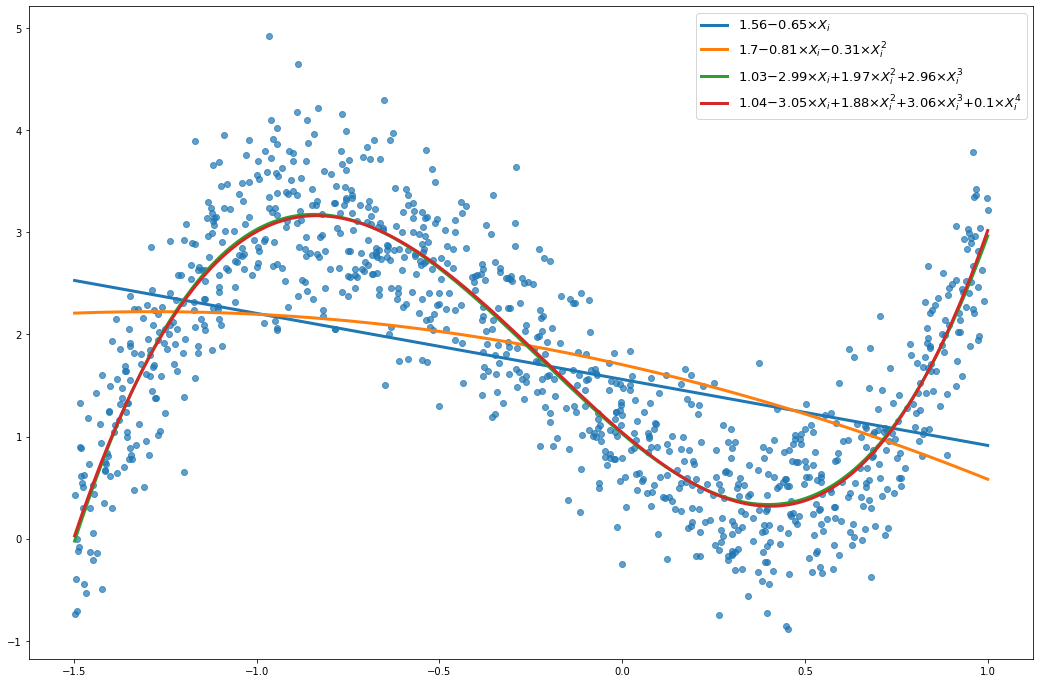

In [306]:
Xi = [r'$X_i^0$',r'$X_i$',r'$X_i^2$',r'$X_i^3$',r'$X_i^4$']
lbl = []
t = ""
for i in range(4):
    for j,n in enumerate(coef[i]):
        if n == 0:
            continue
        if n < 0:
            t += r'$-$'
            n *= -1
        elif j != 0:
            t += r'$+$'
        t += str(n)
        if j != 0:
            t += r'$\times$' + Xi[j]
    lbl.append(t)
    t = ""
plt.figure(figsize=(18,12))
plt.scatter(rand_x,rand_y,alpha=0.7)
for i in range(4):
    plt.plot(np.sort(rand_x),result[i][np.argsort(rand_x)],label=lbl[i],linewidth=3)
plt.legend(fontsize=13)
plt.show()

# Logistic Regression

### Data Generation
一樣用 random，不過是使用 multivariate_normal 這個函數來產資料

In [421]:
X = []
Y = []
x = [[],[]]
cov = [[0.1,0],[0,0.1]]
for i in range(1000):
    y = np.random.randint(0,2)
    mean = [y,y]
    rnd = np.random.multivariate_normal(mean, cov, 1)[0].tolist()
    x[y].append(rnd)
    X.append(rnd)
    Y.append(y)

### Model Construction
使用 sklearn 的模組，accuracy 和 fit 後的函式都在輸出的結果裡面

In [422]:
clf = LogisticRegression(random_state=0).fit(X, Y)
result = clf.predict(X)
print("accuracy :",accuracy_score(Y,result))
print("Yi = L(",round(clf.intercept_[0],2)," + ",round(clf.coef_[0][0],2)," * Xi0 + ",round(clf.coef_[0][1],2)," * Xi1 )")

accuracy : 0.986
Yi = L( -5.17  +  4.78  * Xi0 +  5.41  * Xi1 )


### Result & Bonus
圖如下，decision boundary 是用 pcolormesh 畫的，code 的前半段是為了處理 pcolormesh 所需要的資料

C:\Users\user\AppData\Local\Temp/ipykernel_18856/1048753889.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap='Reds_r',alpha=0.1)


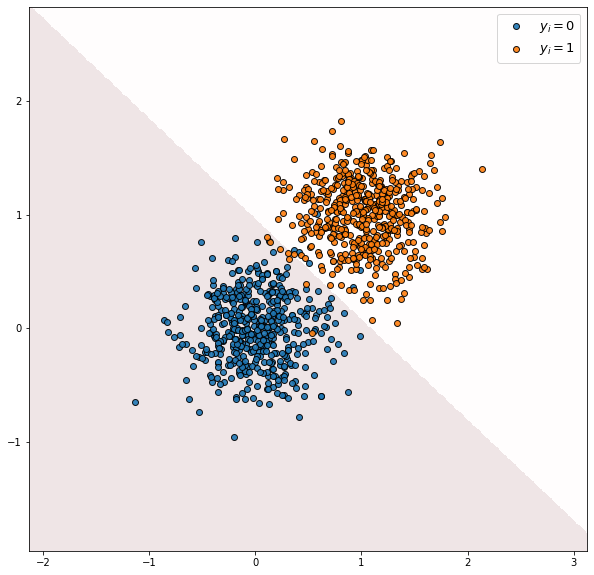

In [451]:
X0 = np.array(x[0]).T.tolist()
X1 = np.array(x[1]).T.tolist()
bonus_test = np.array(X).T
#print(bonus_test.shape)
x_min, x_max = bonus_test[0].min() - 1, bonus_test[0].max() + 1
y_min, y_max = bonus_test[1].min() - 1, bonus_test[1].max() + 1
#print(x_min,x_max,y_min,y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx,yy,Z,cmap='Reds_r',alpha=0.1)
plt.scatter(X0[0],X0[1],label=r'$y_i = 0$',alpha=0.9,edgecolors='black')
plt.scatter(X1[0],X1[1],label=r'$y_i = 1$',alpha=0.9,edgecolors='black')
plt.legend(fontsize=13)
plt.show()